In [65]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [26]:
data = np.loadtxt("data.txt", delimiter=',', skiprows=0)


In [27]:
data.shape

(4480, 535)

In [28]:
df = pd.DataFrame(data=data[:,1:])

In [29]:
df

,0,1,2,3,4,5,6,7,8,9,...,524,525,526,527,528,529,530,531,532,533
0,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,0.10763,...,1015.36,7.170320e+08,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0,1.0
1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,0.11163,...,1015.78,7.058540e+08,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0,1.0
2,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,0.08863,...,1016.16,6.270180e+08,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0,1.0
3,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,0.07163,...,1015.61,5.597480e+08,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0,1.0
4,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,0.07163,...,1015.67,4.844730e+08,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,-0.015981,0.254373,-0.013341,-0.00101,-0.165105,5.15843,1.03999,-1.19301,-0.15801,0.12299,...,1014.61,3.237410e+09,0.132094,9.48535,73.9901,31.82590,5.16972,6390410.0,398810.0,4.0
4476,-0.008857,0.238946,-0.010767,-0.00901,-0.034522,5.43013,1.01499,-1.10201,-0.14501,0.11899,...,1016.07,3.156070e+09,0.133406,8.73701,68.4041,29.83820,5.06743,6214830.0,412407.0,4.0
4477,0.024672,0.213325,0.014417,0.01099,0.613841,4.55481,1.01499,-0.57301,-0.10401,0.13699,...,1016.06,3.052520e+09,0.138525,8.90410,68.5051,30.45150,5.88492,6011070.0,425422.0,4.0
4478,0.025063,0.212210,0.015656,0.01299,0.593249,4.58374,0.95799,-0.64101,-0.10001,0.13299,...,1015.80,3.322710e+09,0.076570,8.97766,72.4431,30.38700,4.43563,6544010.0,439695.0,4.0


In [30]:
data = data[:,1:]
np.random.shuffle(data)

In [31]:
data.shape

(4480, 534)

In [32]:
train = data[0:4032,:]
test = data[4032:]
X = train[:,:-1]
y = train[:,-1]

In [33]:
std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)


In [34]:
X_std.shape

(4032, 533)

In [35]:
y.shape

(4032,)

In [49]:
svm = SVC(kernel = 'poly')
params_grid = [{'degree':[2,3,5,7,10],'C':[10**-1,10**-2,10**1,10**2,10**3,10**4,10**5]}]

In [50]:
svm_GS=GridSearchCV(svm,params_grid,cv =5,scoring ='accuracy',return_train_score = True
                             ,n_jobs=-1)

In [51]:
svm_GS.fit(X_std,y)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.01, 10, 100, 1000, 10000, 100000],
                          'degree': [2, 3, 5, 7, 10]}],
             return_train_score=True, scoring='accuracy')

In [52]:
svm_GS.best_params_

{'C': 100000, 'degree': 3}

In [ ]:
DTC = DecisionTreeClassifier(random_state=1,criterion='entropy')
params_grid=[{'max_features':['auto','log2',50,100,200,300,400,500,None],'min_samples_leaf':[1,50,100,300,500,700,1000],
              'max_depth':[3,5,10,15,20,30,40,None]}]

In [ ]:
DTC_GS =GridSearchCV (DTC,params_grid,cv = cv,scoring = 'accuracy',return_train_score = True
                             ,n_jobs=-1)

In [ ]:
DTC_GS.fit(X,y)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             n_jobs=-1,
             param_grid=[{'max_depth': [3, 5, 10, 15, 20, 30, 40, None],
                          'max_features': ['auto', 'log2', 50, 100, 200, 300,
                                           400, 500, None],
                          'min_samples_leaf': [1, 50, 100, 300, 500, 700,
                                               1000]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
DTC_GS.best_params_

{'max_depth': 30, 'max_features': 100, 'min_samples_leaf': 1}

In [13]:
RF = RandomForestClassifier(random_state=1,criterion='entropy')
params_grid=[{'max_features':['auto','log2',50,100,200,None],'min_samples_leaf':[1,50,100,300],
              'max_depth':[3,5,10,15,20,30,40],
              'n_estimators':[2,5,10],'bootstrap':[True,False]}]

In [16]:
RF_GS =GridSearchCV (RF,params_grid,cv = cv,scoring ='accuracy',return_train_score = True
                             ,n_jobs=-1)

In [17]:
RF_GS.fit(X,y)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=1),
             n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [3, 5, 10, 15, 20, 30, 40],
                          'max_features': ['auto', 'log2', 50, 100, 200, None],
                          'min_samples_leaf': [1, 50, 100, 300],
                          'n_estimators': [2, 5, 10]}],
             return_train_score=True, scoring='accuracy')

In [18]:
RF_GS.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 10}

In [114]:
best_svm = SVC( C = 100000)

In [115]:
best_svm.fit(X_std,y)

SVC(C=100000)

In [38]:
X_test = test[:,:-1]
y_test = test[:,-1]

In [39]:
X_test.shape

(448, 533)

In [40]:
y_test.shape

(448,)

In [41]:
X_test_std = std_scale.transform(X_test)

In [116]:
y_predicted = best_svm.predict(X_test_std)

In [117]:
precision_score(y_test, y_predicted,average = 'weighted')

0.9374671427979873

In [118]:
recall_score(y_test, y_predicted,average = 'weighted')

0.9375

In [119]:
f1_score(y_test, y_predicted,average = 'weighted')

0.9368296194635457

In [120]:
print(classification_report(y_test, y_predicted,target_names = ['4','1','3','2']))

              precision    recall  f1-score   support

           4       0.97      0.99      0.98       120
           1       0.93      0.84      0.88       109
           3       0.87      0.90      0.89       104
           2       0.97      1.00      0.99       115

    accuracy                           0.94       448
   macro avg       0.94      0.93      0.93       448
weighted avg       0.94      0.94      0.94       448



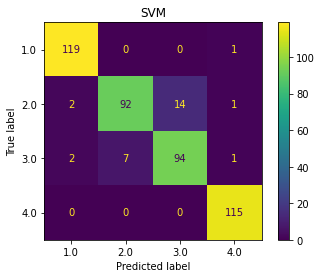

In [121]:
ConfusionMatrixDisplay.from_predictions( y_test,y_predicted)
plt.title("SVM")
plt.show()

In [49]:
best_DT = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth = 30 , max_features = 100 , min_samples_leaf=1)

In [52]:
best_DT.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features=100,
                       random_state=1)

In [53]:
DT_pred = best_DT.predict(X_test)

In [76]:
print(precision_score(y_test,DT_pred,average = 'weighted')
,recall_score(y_test, DT_pred,average = 'weighted')
,f1_score(y_test, DT_pred,average = 'weighted'))

0.9576053102037649 0.9575892857142857 0.9575209309516636


In [54]:
print(classification_report(y_test, DT_pred,target_names = ['4','1','3','2']))

              precision    recall  f1-score   support

           4       0.98      0.97      0.97       120
           1       0.93      0.94      0.94       109
           3       0.93      0.91      0.92       104
           2       0.98      1.00      0.99       115

    accuracy                           0.96       448
   macro avg       0.96      0.96      0.96       448
weighted avg       0.96      0.96      0.96       448



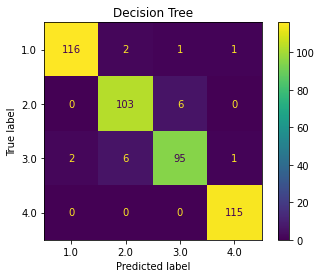

In [62]:
ConfusionMatrixDisplay.from_predictions(y_test,DT_pred)
plt.title("Decision Tree")
plt.show()

In [56]:
best_Random_forest= RandomForestClassifier(random_state=1,criterion='entropy'
                  ,max_depth = 30 , max_features='auto' , n_estimators=10,min_samples_leaf=1,bootstrap = False)

In [58]:
best_Random_forest.fit(X,y)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       n_estimators=10, random_state=1)

In [59]:
RF_pred = best_Random_forest.predict ( X_test)

In [77]:
print(precision_score(y_test,RF_pred,average = 'weighted')
,recall_score(y_test, RF_pred,average = 'weighted')
,f1_score(y_test, RF_pred,average = 'weighted'))

0.9933224845542806 0.9933035714285714 0.9933026851300377


In [60]:
print(classification_report(y_test, RF_pred ,target_names = ['4','1','3','2']))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00       120
           1       0.98      0.99      0.99       109
           3       0.99      0.98      0.99       104
           2       1.00      1.00      1.00       115

    accuracy                           0.99       448
   macro avg       0.99      0.99      0.99       448
weighted avg       0.99      0.99      0.99       448



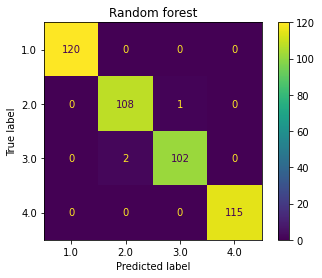

In [112]:
ConfusionMatrixDisplay.from_predictions(y_test,RF_pred )
plt.title("Random forest")
plt.show()

In [128]:
XGB = XGBClassifier(use_label_encoder=False,max_depth=30,n_estimators=10)

In [129]:
XGB.fit(X,y)

XGBClassifier(max_depth=30, n_estimators=10, objective='multi:softprob',
              use_label_encoder=False)

In [130]:
XGBpred = XGB.predict(X_test)

In [131]:
print(classification_report(y_test, XGBpred,target_names = ['4','1','3','2']))

              precision    recall  f1-score   support

           4       1.00      0.99      1.00       120
           1       0.96      0.98      0.97       109
           3       0.98      0.96      0.97       104
           2       0.99      1.00      1.00       115

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448



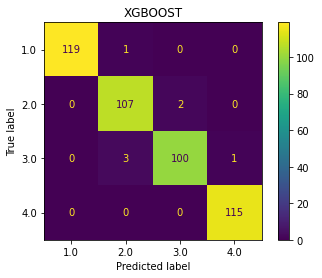

In [132]:
ConfusionMatrixDisplay.from_predictions(y_test,XGBpred)
plt.title("XGBOOST")
plt.show()

In [127]:
print(precision_score(y_test,XGBpred,average = 'weighted')
,recall_score(y_test, XGBpred,average = 'weighted')
,f1_score(y_test, XGBpred,average = 'weighted'))

0.9696460448076828 0.96875 0.9688344826869019
